In [1]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D,MaxPooling2D, Flatten,Dropout, BatchNormalization

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
# helper

def y2indicator(Y):
    N = len(Y)
    K = len(set(Y))
    I = np.zeros((N,K))
    I[np.arange(N),Y] = 1
    return I


#### Get the data

- Convert to nump|
- Normalize
- Y should be one-got encoded labels

In [11]:
data = pd.read_csv('data/fashion-mnist_train.csv')

data = data.values
np.random.shuffle(data)

X = data[:,1:].reshape(-1,28,28,1)/255.0
Y = data[:,0].astype(np.int32)

# get shapes
# N = len(Y)

K = len(set(Y))

# by default Keras wants one-hot encoded labels
# there's another cost function we can use
# where we can just pass in the integer labels directly
# just like Tensorflow / Theano

Y = y2indicator(Y)


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Build the model

In [13]:
model = Sequential()

model.add(Conv2D(input_shape = (28,28,1),filters = 32,kernel_size= (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 64,kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 128,kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units = 300))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units = K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

# note: multiple ways to choose a backend
# either theano, tensorflow, or cntk
# https://keras.io/backend/


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
activation_7 (Activation)    (None, 11, 11, 64)        0         
__________

#### Train Model

In [14]:
# gives us back a <keras.callbacks.History object at 0x112e61a90>
r = model.fit(X,Y,validation_split = 0.33,epochs = 15,batch_size = 32)
print('Return:',r)

Train on 40199 samples, validate on 19801 samples
Epoch 1/15
40199/40199 [==============================] - 61s 2ms/step - loss: 0.5123 - acc: 0.8142 - val_loss: 0.3962 - val_acc: 0.8556
Epoch 2/15
40199/40199 [==============================] - 32s 802us/step - loss: 0.3652 - acc: 0.8652 - val_loss: 0.3495 - val_acc: 0.8728
Epoch 3/15
40199/40199 [==============================] - 32s 799us/step - loss: 0.3178 - acc: 0.8835 - val_loss: 0.3428 - val_acc: 0.8742
Epoch 4/15
40199/40199 [==============================] - 32s 797us/step - loss: 0.2831 - acc: 0.8952 - val_loss: 0.3201 - val_acc: 0.8828
Epoch 5/15
40199/40199 [==============================] - 32s 808us/step - loss: 0.2553 - acc: 0.9048 - val_loss: 0.3380 - val_acc: 0.8762
Epoch 6/15
40199/40199 [==============================] - 33s 814us/step - loss: 0.2292 - acc: 0.9144 - val_loss: 0.3066 - val_acc: 0.8954
Epoch 7/15
40199/40199 [==============================] - 34s 846us/step - loss: 0.2075 - acc: 0.9222 - val_loss: 0.32

dict_keys(['val_acc', 'loss', 'val_loss', 'acc'])


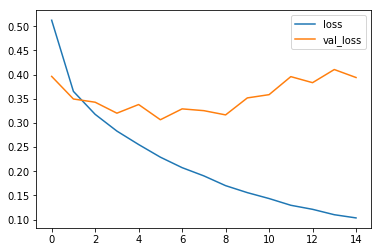

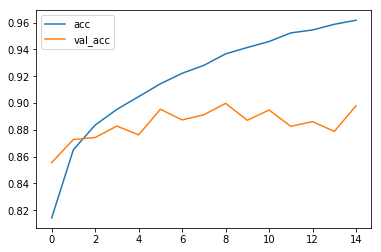

In [15]:
# print the available keys
# should see: dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])
print(r.history.keys())

# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()
